In [57]:
# code is taken fromhttps://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac

import numpy as np
import tensorflow as tf


In [58]:
corpus_raw = 'He is the king . The king is royal . She is the royal queen'
# convert to lower case
corpus_raw = corpus_raw.lower()

In [59]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

In [60]:
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
print(words)

{'queen', 'she', 'royal', 'he', 'is', 'the', 'king'}


In [61]:
# relevant for one-hot-encoding
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [62]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [63]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [64]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [65]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [66]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [67]:
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [68]:
print(x_train)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [69]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


In [70]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [71]:
# Get representation

EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [72]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [73]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

In [74]:
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  5.37565
loss is :  5.060315
loss is :  4.8098855
loss is :  4.5999603
loss is :  4.417927
loss is :  4.2566667
loss is :  4.1117964
loss is :  3.9803793
loss is :  3.860308
loss is :  3.7499769
loss is :  3.6481183
loss is :  3.5536976
loss is :  3.4658623
loss is :  3.3838978
loss is :  3.307206
loss is :  3.2352767
loss is :  3.1676753
loss is :  3.1040263
loss is :  3.044001
loss is :  2.9873087
loss is :  2.9336882
loss is :  2.8829057
loss is :  2.8347478
loss is :  2.7890217
loss is :  2.7455506
loss is :  2.7041748
loss is :  2.6647487
loss is :  2.6271389
loss is :  2.5912254
loss is :  2.5568984
loss is :  2.5240586
loss is :  2.4926152
loss is :  2.4624846
loss is :  2.4335918
loss is :  2.4058669
loss is :  2.3792455
loss is :  2.3536682
loss is :  2.3290803
loss is :  2.3054302
loss is :  2.282671
loss is :  2.2607572
loss is :  2.2396476
loss is :  2.2193031
loss is :  2.1996872
loss is :  2.1807652
loss is :  2.162505
loss is :  2.1448758
loss is :  2.1278489
l

loss is :  1.3958709
loss is :  1.395596
loss is :  1.3953226
loss is :  1.3950504
loss is :  1.3947796
loss is :  1.3945099
loss is :  1.3942417
loss is :  1.3939748
loss is :  1.393709
loss is :  1.3934447
loss is :  1.3931814
loss is :  1.3929194
loss is :  1.392659
loss is :  1.3923995
loss is :  1.3921413
loss is :  1.3918844
loss is :  1.3916287
loss is :  1.3913742
loss is :  1.391121
loss is :  1.390869
loss is :  1.3906181
loss is :  1.3903685
loss is :  1.39012
loss is :  1.3898727
loss is :  1.3896265
loss is :  1.3893814
loss is :  1.3891379
loss is :  1.3888952
loss is :  1.3886536
loss is :  1.3884134
loss is :  1.3881742
loss is :  1.3879361
loss is :  1.387699
loss is :  1.3874632
loss is :  1.3872285
loss is :  1.3869947
loss is :  1.3867621
loss is :  1.3865309
loss is :  1.3863004
loss is :  1.3860711
loss is :  1.3858429
loss is :  1.3856157
loss is :  1.3853897
loss is :  1.3851647
loss is :  1.3849405
loss is :  1.3847175
loss is :  1.3844957
loss is :  1.3842748


loss is :  1.3414272
loss is :  1.3413764
loss is :  1.3413262
loss is :  1.341276
loss is :  1.3412259
loss is :  1.3411762
loss is :  1.3411264
loss is :  1.3410769
loss is :  1.3410275
loss is :  1.3409783
loss is :  1.3409293
loss is :  1.3408805
loss is :  1.3408318
loss is :  1.3407832
loss is :  1.340735
loss is :  1.3406867
loss is :  1.3406386
loss is :  1.3405907
loss is :  1.3405429
loss is :  1.3404953
loss is :  1.340448
loss is :  1.3404009
loss is :  1.3403537
loss is :  1.3403068
loss is :  1.3402601
loss is :  1.3402134
loss is :  1.340167
loss is :  1.3401207
loss is :  1.3400744
loss is :  1.3400284
loss is :  1.3399826
loss is :  1.3399369
loss is :  1.3398914
loss is :  1.3398461
loss is :  1.3398007
loss is :  1.3397558
loss is :  1.339711
loss is :  1.339666
loss is :  1.3396215
loss is :  1.339577
loss is :  1.3395325
loss is :  1.3394884
loss is :  1.3394443
loss is :  1.3394004
loss is :  1.3393565
loss is :  1.3393131
loss is :  1.3392696
loss is :  1.3392262

loss is :  1.3295125
loss is :  1.3294985
loss is :  1.3294848
loss is :  1.3294709
loss is :  1.3294572
loss is :  1.3294435
loss is :  1.3294297
loss is :  1.3294159
loss is :  1.3294024
loss is :  1.3293886
loss is :  1.3293753
loss is :  1.3293617
loss is :  1.3293482
loss is :  1.3293346
loss is :  1.3293213
loss is :  1.3293078
loss is :  1.3292946
loss is :  1.3292813
loss is :  1.3292679
loss is :  1.3292546
loss is :  1.3292414
loss is :  1.3292282
loss is :  1.3292149
loss is :  1.3292017
loss is :  1.3291885
loss is :  1.3291755
loss is :  1.3291625
loss is :  1.3291495
loss is :  1.3291365
loss is :  1.3291236
loss is :  1.3291106
loss is :  1.3290979
loss is :  1.3290851
loss is :  1.3290721
loss is :  1.3290595
loss is :  1.3290467
loss is :  1.3290339
loss is :  1.3290212
loss is :  1.3290086
loss is :  1.328996
loss is :  1.3289833
loss is :  1.3289707
loss is :  1.3289582
loss is :  1.3289458
loss is :  1.3289332
loss is :  1.3289207
loss is :  1.3289083
loss is :  1.3

loss is :  1.325702
loss is :  1.3256965
loss is :  1.325691
loss is :  1.3256855
loss is :  1.3256801
loss is :  1.3256748
loss is :  1.3256693
loss is :  1.3256637
loss is :  1.3256584
loss is :  1.3256528
loss is :  1.3256476
loss is :  1.3256422
loss is :  1.3256369
loss is :  1.3256315
loss is :  1.3256261
loss is :  1.3256208
loss is :  1.3256155
loss is :  1.3256102
loss is :  1.3256048
loss is :  1.3255996
loss is :  1.3255943
loss is :  1.325589
loss is :  1.3255836
loss is :  1.3255783
loss is :  1.3255732
loss is :  1.325568
loss is :  1.3255626
loss is :  1.3255575
loss is :  1.3255522
loss is :  1.3255471
loss is :  1.3255417
loss is :  1.3255366
loss is :  1.3255315
loss is :  1.3255262
loss is :  1.3255211
loss is :  1.325516
loss is :  1.3255109
loss is :  1.3255056
loss is :  1.3255006
loss is :  1.3254955
loss is :  1.3254904
loss is :  1.3254852
loss is :  1.3254801
loss is :  1.325475
loss is :  1.32547
loss is :  1.325465
loss is :  1.3254598
loss is :  1.3254548
l

loss is :  1.3240153
loss is :  1.3240125
loss is :  1.3240099
loss is :  1.324007
loss is :  1.3240042
loss is :  1.3240016
loss is :  1.3239986
loss is :  1.323996
loss is :  1.3239932
loss is :  1.3239905
loss is :  1.3239876
loss is :  1.3239851
loss is :  1.3239822
loss is :  1.3239794
loss is :  1.3239768
loss is :  1.323974
loss is :  1.3239714
loss is :  1.3239685
loss is :  1.323966
loss is :  1.3239633
loss is :  1.3239604
loss is :  1.3239578
loss is :  1.3239552
loss is :  1.3239524
loss is :  1.3239498
loss is :  1.3239471
loss is :  1.3239443
loss is :  1.3239416
loss is :  1.3239392
loss is :  1.3239365
loss is :  1.3239336
loss is :  1.3239311
loss is :  1.3239285
loss is :  1.3239257
loss is :  1.323923
loss is :  1.3239204
loss is :  1.3239179
loss is :  1.3239151
loss is :  1.3239126
loss is :  1.3239099
loss is :  1.3239073
loss is :  1.3239046
loss is :  1.323902
loss is :  1.3238995
loss is :  1.3238968
loss is :  1.3238943
loss is :  1.3238916
loss is :  1.323889

loss is :  1.3230903
loss is :  1.3230886
loss is :  1.323087
loss is :  1.3230854
loss is :  1.3230838
loss is :  1.3230822
loss is :  1.3230807
loss is :  1.3230791
loss is :  1.3230773
loss is :  1.3230757
loss is :  1.3230741
loss is :  1.3230727
loss is :  1.3230709
loss is :  1.3230693
loss is :  1.3230677
loss is :  1.323066
loss is :  1.3230646
loss is :  1.323063
loss is :  1.3230613
loss is :  1.3230598
loss is :  1.3230581
loss is :  1.3230565
loss is :  1.3230549
loss is :  1.3230534
loss is :  1.3230518
loss is :  1.3230504
loss is :  1.3230486
loss is :  1.323047
loss is :  1.3230455
loss is :  1.323044
loss is :  1.3230423
loss is :  1.323041
loss is :  1.323039
loss is :  1.3230376
loss is :  1.3230361
loss is :  1.3230346
loss is :  1.323033
loss is :  1.3230314
loss is :  1.3230299
loss is :  1.3230282
loss is :  1.3230267
loss is :  1.3230252
loss is :  1.3230237
loss is :  1.3230221
loss is :  1.3230206
loss is :  1.3230189
loss is :  1.3230174
loss is :  1.3230158


loss is :  1.3225222
loss is :  1.3225211
loss is :  1.32252
loss is :  1.322519
loss is :  1.3225179
loss is :  1.3225168
loss is :  1.3225157
loss is :  1.3225145
loss is :  1.3225136
loss is :  1.3225126
loss is :  1.3225116
loss is :  1.3225105
loss is :  1.3225094
loss is :  1.3225085
loss is :  1.3225074
loss is :  1.3225064
loss is :  1.3225054
loss is :  1.3225043
loss is :  1.3225032
loss is :  1.3225023
loss is :  1.3225012
loss is :  1.3225001
loss is :  1.322499
loss is :  1.322498
loss is :  1.322497
loss is :  1.322496
loss is :  1.322495
loss is :  1.3224939
loss is :  1.322493
loss is :  1.3224919
loss is :  1.3224908
loss is :  1.3224897
loss is :  1.3224888
loss is :  1.3224878
loss is :  1.3224868
loss is :  1.3224858
loss is :  1.3224847
loss is :  1.3224839
loss is :  1.3224828
loss is :  1.3224818
loss is :  1.3224806
loss is :  1.3224796
loss is :  1.3224785
loss is :  1.3224776
loss is :  1.3224765
loss is :  1.3224757
loss is :  1.3224746
loss is :  1.3224738
l

loss is :  1.3221408
loss is :  1.3221401
loss is :  1.3221393
loss is :  1.3221387
loss is :  1.3221378
loss is :  1.3221372
loss is :  1.3221364
loss is :  1.3221356
loss is :  1.3221349
loss is :  1.3221341
loss is :  1.3221335
loss is :  1.3221328
loss is :  1.322132
loss is :  1.3221312
loss is :  1.3221307
loss is :  1.3221298
loss is :  1.3221292
loss is :  1.3221285
loss is :  1.3221277
loss is :  1.322127
loss is :  1.3221264
loss is :  1.3221256
loss is :  1.3221248
loss is :  1.322124
loss is :  1.3221234
loss is :  1.3221228
loss is :  1.322122
loss is :  1.3221213
loss is :  1.3221205
loss is :  1.3221197
loss is :  1.3221191
loss is :  1.3221184
loss is :  1.3221177
loss is :  1.322117
loss is :  1.3221161
loss is :  1.3221157
loss is :  1.3221148
loss is :  1.3221141
loss is :  1.3221134
loss is :  1.3221126
loss is :  1.3221121
loss is :  1.3221112
loss is :  1.3221104
loss is :  1.3221098
loss is :  1.3221092
loss is :  1.3221084
loss is :  1.3221078
loss is :  1.32210

loss is :  1.3218687
loss is :  1.3218681
loss is :  1.3218676
loss is :  1.3218671
loss is :  1.3218665
loss is :  1.321866
loss is :  1.3218656
loss is :  1.3218648
loss is :  1.3218644
loss is :  1.3218638
loss is :  1.3218633
loss is :  1.3218627
loss is :  1.3218622
loss is :  1.3218617
loss is :  1.3218611
loss is :  1.3218607
loss is :  1.3218602
loss is :  1.3218597
loss is :  1.3218591
loss is :  1.3218585
loss is :  1.3218582
loss is :  1.3218576
loss is :  1.3218571
loss is :  1.3218565
loss is :  1.3218559
loss is :  1.3218554
loss is :  1.3218547
loss is :  1.3218545
loss is :  1.3218539
loss is :  1.3218532
loss is :  1.3218527
loss is :  1.3218522
loss is :  1.3218517
loss is :  1.3218511
loss is :  1.3218508
loss is :  1.3218502
loss is :  1.3218496
loss is :  1.3218491
loss is :  1.3218486
loss is :  1.3218482
loss is :  1.3218476
loss is :  1.321847
loss is :  1.3218466
loss is :  1.321846
loss is :  1.3218455
loss is :  1.321845
loss is :  1.3218445
loss is :  1.3218

loss is :  1.3216685
loss is :  1.321668
loss is :  1.3216677
loss is :  1.3216672
loss is :  1.321667
loss is :  1.3216664
loss is :  1.3216661
loss is :  1.3216656
loss is :  1.3216653
loss is :  1.3216648
loss is :  1.3216645
loss is :  1.3216639
loss is :  1.3216637
loss is :  1.3216631
loss is :  1.3216628
loss is :  1.3216623
loss is :  1.321662
loss is :  1.3216617
loss is :  1.3216612
loss is :  1.3216609
loss is :  1.3216603
loss is :  1.32166
loss is :  1.3216596
loss is :  1.3216592
loss is :  1.3216587
loss is :  1.3216584
loss is :  1.321658
loss is :  1.3216577
loss is :  1.3216572
loss is :  1.3216568
loss is :  1.3216563
loss is :  1.321656
loss is :  1.3216556
loss is :  1.321655
loss is :  1.3216548
loss is :  1.3216543
loss is :  1.3216541
loss is :  1.3216536
loss is :  1.3216532
loss is :  1.3216527
loss is :  1.3216524
loss is :  1.321652
loss is :  1.3216516
loss is :  1.3216512
loss is :  1.3216507
loss is :  1.3216505
loss is :  1.32165
loss is :  1.3216497
los

loss is :  1.3215138
loss is :  1.3215133
loss is :  1.321513
loss is :  1.3215128
loss is :  1.3215125
loss is :  1.3215121
loss is :  1.3215116
loss is :  1.3215114
loss is :  1.3215113
loss is :  1.3215109
loss is :  1.3215106
loss is :  1.3215103
loss is :  1.3215098
loss is :  1.3215096
loss is :  1.3215094
loss is :  1.3215091
loss is :  1.3215088
loss is :  1.3215083
loss is :  1.321508
loss is :  1.3215077
loss is :  1.3215073
loss is :  1.3215071
loss is :  1.3215067
loss is :  1.3215065
loss is :  1.3215061
loss is :  1.3215057
loss is :  1.3215055
loss is :  1.3215053
loss is :  1.3215047
loss is :  1.3215046
loss is :  1.3215042
loss is :  1.3215039
loss is :  1.3215036
loss is :  1.3215032
loss is :  1.3215029
loss is :  1.3215027
loss is :  1.3215022
loss is :  1.3215021
loss is :  1.3215017
loss is :  1.3215014
loss is :  1.3215011
loss is :  1.3215007
loss is :  1.3215005
loss is :  1.3215002
loss is :  1.3214998
loss is :  1.3214996
loss is :  1.3214992
loss is :  1.32

loss is :  1.3213892
loss is :  1.3213891
loss is :  1.3213888
loss is :  1.3213885
loss is :  1.3213882
loss is :  1.321388
loss is :  1.3213876
loss is :  1.3213874
loss is :  1.3213873
loss is :  1.3213869
loss is :  1.3213867
loss is :  1.3213865
loss is :  1.3213862
loss is :  1.3213859
loss is :  1.3213856
loss is :  1.3213854
loss is :  1.3213851
loss is :  1.3213849
loss is :  1.3213847
loss is :  1.3213845
loss is :  1.3213841
loss is :  1.321384
loss is :  1.3213836
loss is :  1.3213834
loss is :  1.3213831
loss is :  1.321383
loss is :  1.3213826
loss is :  1.3213823
loss is :  1.3213822
loss is :  1.3213819
loss is :  1.3213816
loss is :  1.3213814
loss is :  1.3213811
loss is :  1.3213809
loss is :  1.3213806
loss is :  1.3213804
loss is :  1.3213801
loss is :  1.3213798
loss is :  1.3213797
loss is :  1.3213795
loss is :  1.3213791
loss is :  1.321379
loss is :  1.3213787
loss is :  1.3213784
loss is :  1.3213781
loss is :  1.3213779
loss is :  1.3213778
loss is :  1.3213

loss is :  1.3212892
loss is :  1.321289
loss is :  1.3212888
loss is :  1.3212886
loss is :  1.3212882
loss is :  1.3212881
loss is :  1.321288
loss is :  1.3212878
loss is :  1.3212874
loss is :  1.3212874
loss is :  1.3212872
loss is :  1.3212868
loss is :  1.3212866
loss is :  1.3212863
loss is :  1.3212862
loss is :  1.3212862
loss is :  1.321286
loss is :  1.3212856
loss is :  1.3212854
loss is :  1.3212851
loss is :  1.3212849
loss is :  1.3212848
loss is :  1.3212845
loss is :  1.3212843
loss is :  1.3212842
loss is :  1.321284
loss is :  1.3212838
loss is :  1.3212836
loss is :  1.3212833
loss is :  1.3212831
loss is :  1.321283
loss is :  1.3212827
loss is :  1.3212824
loss is :  1.3212823
loss is :  1.3212821
loss is :  1.3212819
loss is :  1.3212817
loss is :  1.3212814
loss is :  1.3212813
loss is :  1.3212811
loss is :  1.3212808
loss is :  1.3212806
loss is :  1.3212805
loss is :  1.3212802
loss is :  1.3212801
loss is :  1.3212799
loss is :  1.3212796
loss is :  1.32127

loss is :  1.3212078
loss is :  1.3212074
loss is :  1.3212072
loss is :  1.3212072
loss is :  1.3212069
loss is :  1.3212067
loss is :  1.3212066
loss is :  1.3212062
loss is :  1.3212061
loss is :  1.3212061
loss is :  1.3212059
loss is :  1.3212056
loss is :  1.3212055
loss is :  1.3212054
loss is :  1.3212051
loss is :  1.3212049
loss is :  1.3212048
loss is :  1.3212045
loss is :  1.3212044
loss is :  1.3212043
loss is :  1.3212041
loss is :  1.3212041
loss is :  1.3212037
loss is :  1.3212036
loss is :  1.3212035
loss is :  1.3212032
loss is :  1.321203
loss is :  1.3212029
loss is :  1.3212026
loss is :  1.3212025
loss is :  1.3212023
loss is :  1.3212022
loss is :  1.3212022
loss is :  1.3212019
loss is :  1.3212018
loss is :  1.3212014
loss is :  1.3212012
loss is :  1.3212011
loss is :  1.321201
loss is :  1.3212008
loss is :  1.3212006
loss is :  1.3212004
loss is :  1.3212004
loss is :  1.3212003
loss is :  1.3212
loss is :  1.3211998
loss is :  1.3211997
loss is :  1.32119

loss is :  1.3211385
loss is :  1.3211383
loss is :  1.3211383
loss is :  1.3211381
loss is :  1.321138
loss is :  1.3211377
loss is :  1.3211377
loss is :  1.3211375
loss is :  1.3211374
loss is :  1.3211374
loss is :  1.3211371
loss is :  1.321137
loss is :  1.3211367
loss is :  1.3211366
loss is :  1.3211365
loss is :  1.3211364
loss is :  1.3211362
loss is :  1.3211361
loss is :  1.3211359
loss is :  1.3211359
loss is :  1.3211356
loss is :  1.3211355
loss is :  1.3211353
loss is :  1.3211352
loss is :  1.3211349
loss is :  1.3211349
loss is :  1.3211347
loss is :  1.3211347
loss is :  1.3211344
loss is :  1.3211342
loss is :  1.3211341
loss is :  1.321134
loss is :  1.3211339
loss is :  1.3211337
loss is :  1.3211336
loss is :  1.3211335
loss is :  1.3211334
loss is :  1.3211331
loss is :  1.321133
loss is :  1.3211329
loss is :  1.3211325
loss is :  1.3211325
loss is :  1.3211323
loss is :  1.3211323
loss is :  1.3211322
loss is :  1.321132
loss is :  1.3211317
loss is :  1.32113

loss is :  1.3210791
loss is :  1.3210791
loss is :  1.321079
loss is :  1.3210788
loss is :  1.3210788
loss is :  1.3210787
loss is :  1.3210783
loss is :  1.3210783
loss is :  1.3210782
loss is :  1.3210782
loss is :  1.3210781
loss is :  1.321078
loss is :  1.3210777
loss is :  1.3210776
loss is :  1.3210773
loss is :  1.3210773
loss is :  1.3210773
loss is :  1.3210771
loss is :  1.3210771
loss is :  1.3210768
loss is :  1.3210768
loss is :  1.3210765
loss is :  1.3210764
loss is :  1.3210764
loss is :  1.3210763
loss is :  1.3210762
loss is :  1.321076
loss is :  1.3210758
loss is :  1.3210758
loss is :  1.3210756
loss is :  1.3210756
loss is :  1.3210753
loss is :  1.3210752
loss is :  1.3210751
loss is :  1.321075
loss is :  1.3210748
loss is :  1.3210747
loss is :  1.3210746
loss is :  1.3210745
loss is :  1.3210744
loss is :  1.3210742
loss is :  1.3210742
loss is :  1.321074
loss is :  1.321074
loss is :  1.3210738
loss is :  1.3210738
loss is :  1.3210734
loss is :  1.321073

loss is :  1.3210287
loss is :  1.3210286
loss is :  1.3210285
loss is :  1.3210284
loss is :  1.3210284
loss is :  1.3210282
loss is :  1.3210281
loss is :  1.3210279
loss is :  1.3210279
loss is :  1.3210276
loss is :  1.3210275
loss is :  1.3210275
loss is :  1.3210273
loss is :  1.3210273
loss is :  1.3210272
loss is :  1.321027
loss is :  1.3210269
loss is :  1.3210268
loss is :  1.3210268
loss is :  1.3210267
loss is :  1.3210266
loss is :  1.3210264
loss is :  1.3210263
loss is :  1.3210263
loss is :  1.3210261
loss is :  1.321026
loss is :  1.3210257
loss is :  1.3210257
loss is :  1.3210255
loss is :  1.3210255
loss is :  1.3210255
loss is :  1.3210254
loss is :  1.3210251
loss is :  1.3210251
loss is :  1.3210249
loss is :  1.3210249
loss is :  1.3210248
loss is :  1.3210248
loss is :  1.3210247
loss is :  1.3210245
loss is :  1.3210243
loss is :  1.3210242
loss is :  1.3210242
loss is :  1.3210241
loss is :  1.321024
loss is :  1.3210238
loss is :  1.3210237
loss is :  1.321

loss is :  1.3209848
loss is :  1.3209846
loss is :  1.3209845
loss is :  1.3209844
loss is :  1.3209844
loss is :  1.3209842
loss is :  1.3209841
loss is :  1.3209841
loss is :  1.320984
loss is :  1.3209839
loss is :  1.3209836
loss is :  1.3209836
loss is :  1.3209834
loss is :  1.3209834
loss is :  1.3209833
loss is :  1.3209833
loss is :  1.3209832
loss is :  1.3209832
loss is :  1.3209829
loss is :  1.3209829
loss is :  1.3209829
loss is :  1.3209827
loss is :  1.3209827
loss is :  1.3209825
loss is :  1.3209825
loss is :  1.3209823
loss is :  1.3209822
loss is :  1.3209821
loss is :  1.3209821
loss is :  1.3209819
loss is :  1.3209819
loss is :  1.3209816
loss is :  1.3209816
loss is :  1.3209816
loss is :  1.3209815
loss is :  1.3209814
loss is :  1.3209814
loss is :  1.320981
loss is :  1.320981
loss is :  1.320981
loss is :  1.3209809
loss is :  1.3209809
loss is :  1.3209807
loss is :  1.3209807
loss is :  1.3209805
loss is :  1.3209805
loss is :  1.3209803
loss is :  1.3209

loss is :  1.3209467
loss is :  1.3209465
loss is :  1.3209463
loss is :  1.3209463
loss is :  1.3209461
loss is :  1.3209461
loss is :  1.3209461
loss is :  1.3209459
loss is :  1.3209459
loss is :  1.3209459
loss is :  1.3209457
loss is :  1.3209455
loss is :  1.3209455
loss is :  1.3209455
loss is :  1.3209453
loss is :  1.3209453
loss is :  1.3209451
loss is :  1.320945
loss is :  1.320945
loss is :  1.3209448
loss is :  1.3209448
loss is :  1.3209447
loss is :  1.3209447
loss is :  1.3209447
loss is :  1.3209447
loss is :  1.3209445
loss is :  1.3209444
loss is :  1.3209443
loss is :  1.3209443
loss is :  1.3209442
loss is :  1.320944
loss is :  1.320944
loss is :  1.3209438
loss is :  1.3209438
loss is :  1.3209437
loss is :  1.3209436
loss is :  1.3209435
loss is :  1.3209435
loss is :  1.3209434
loss is :  1.3209432
loss is :  1.3209432
loss is :  1.3209429
loss is :  1.320943
loss is :  1.3209429
loss is :  1.3209429
loss is :  1.3209428
loss is :  1.3209428
loss is :  1.32094

loss is :  1.3209131
loss is :  1.3209128
loss is :  1.3209128
loss is :  1.3209127
loss is :  1.3209126
loss is :  1.3209125
loss is :  1.3209125
loss is :  1.3209124
loss is :  1.3209124
loss is :  1.3209124
loss is :  1.3209124
loss is :  1.3209122
loss is :  1.3209121
loss is :  1.3209122
loss is :  1.320912
loss is :  1.320912
loss is :  1.3209119
loss is :  1.3209116
loss is :  1.3209118
loss is :  1.3209115
loss is :  1.3209115
loss is :  1.3209114
loss is :  1.3209114
loss is :  1.3209113
loss is :  1.3209113
loss is :  1.3209113
loss is :  1.320911
loss is :  1.3209109
loss is :  1.3209109
loss is :  1.3209108
loss is :  1.3209107
loss is :  1.3209107
loss is :  1.3209106
loss is :  1.3209106
loss is :  1.3209105
loss is :  1.3209105
loss is :  1.3209105
loss is :  1.3209103
loss is :  1.3209103
loss is :  1.3209101
loss is :  1.32091
loss is :  1.32091
loss is :  1.32091
loss is :  1.3209099
loss is :  1.3209099
loss is :  1.3209097
loss is :  1.3209097
loss is :  1.3209095
l

loss is :  1.3208838
loss is :  1.3208838
loss is :  1.3208835
loss is :  1.3208835
loss is :  1.3208835
loss is :  1.3208834
loss is :  1.3208835
loss is :  1.3208834
loss is :  1.3208833
loss is :  1.3208833
loss is :  1.3208833
loss is :  1.320883
loss is :  1.3208829
loss is :  1.3208829
loss is :  1.3208827
loss is :  1.3208827
loss is :  1.3208828
loss is :  1.3208826
loss is :  1.3208826
loss is :  1.3208824
loss is :  1.3208824
loss is :  1.3208823
loss is :  1.3208823
loss is :  1.3208822
loss is :  1.3208822
loss is :  1.320882
loss is :  1.320882
loss is :  1.3208818
loss is :  1.3208818
loss is :  1.3208818
loss is :  1.3208817
loss is :  1.3208817
loss is :  1.3208817
loss is :  1.3208817
loss is :  1.3208816
loss is :  1.3208816
loss is :  1.3208815
loss is :  1.3208812
loss is :  1.3208811
loss is :  1.3208811
loss is :  1.3208811
loss is :  1.320881
loss is :  1.320881
loss is :  1.3208809
loss is :  1.3208809
loss is :  1.3208808
loss is :  1.3208808
loss is :  1.32088

loss is :  1.3208569
loss is :  1.3208568
loss is :  1.3208568
loss is :  1.3208567
loss is :  1.3208566
loss is :  1.3208565
loss is :  1.3208565
loss is :  1.3208563
loss is :  1.3208563
loss is :  1.3208562
loss is :  1.3208562
loss is :  1.3208562
loss is :  1.320856
loss is :  1.320856
loss is :  1.320856
loss is :  1.3208559
loss is :  1.320856
loss is :  1.3208557
loss is :  1.3208556
loss is :  1.3208555
loss is :  1.3208555
loss is :  1.3208555
loss is :  1.3208554
loss is :  1.3208554
loss is :  1.3208554
loss is :  1.3208553
loss is :  1.3208553
loss is :  1.3208551
loss is :  1.3208551
loss is :  1.3208551
loss is :  1.3208551
loss is :  1.3208551
loss is :  1.3208549
loss is :  1.3208548
loss is :  1.3208548
loss is :  1.3208547
loss is :  1.3208547
loss is :  1.3208547
loss is :  1.3208545
loss is :  1.3208544
loss is :  1.3208544
loss is :  1.3208544
loss is :  1.3208543
loss is :  1.3208544
loss is :  1.3208543
loss is :  1.3208542
loss is :  1.3208541
loss is :  1.3208

loss is :  1.3208337
loss is :  1.3208337
loss is :  1.3208336
loss is :  1.3208336
loss is :  1.3208333
loss is :  1.3208336
loss is :  1.3208333
loss is :  1.3208333
loss is :  1.3208333
loss is :  1.3208332
loss is :  1.3208331
loss is :  1.3208331
loss is :  1.3208331
loss is :  1.3208331
loss is :  1.3208328
loss is :  1.3208328
loss is :  1.3208328
loss is :  1.3208328
loss is :  1.3208326
loss is :  1.3208326
loss is :  1.3208325
loss is :  1.3208325
loss is :  1.3208325
loss is :  1.3208324
loss is :  1.3208323
loss is :  1.3208323
loss is :  1.3208323
loss is :  1.3208323
loss is :  1.3208323
loss is :  1.3208323
loss is :  1.3208321
loss is :  1.3208321
loss is :  1.320832
loss is :  1.3208319
loss is :  1.3208319
loss is :  1.3208318
loss is :  1.3208317
loss is :  1.3208315
loss is :  1.3208317
loss is :  1.3208315
loss is :  1.3208315
loss is :  1.3208315
loss is :  1.3208314
loss is :  1.3208314
loss is :  1.3208313
loss is :  1.3208313
loss is :  1.3208313
loss is :  1.3

In [75]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.340787   -0.45795754 -2.6555362  -0.29807055  0.35936007]
 [ 0.28547195 -0.61570674  0.01879312  1.0979059   1.767413  ]
 [-1.8712653  -2.0929172   0.04398356  1.1583977   0.778397  ]
 [ 0.7890279   0.23432857  0.34521008  0.76973796  1.8568823 ]
 [-1.1025901   3.1107552  -0.8921431   0.07522006  0.7664767 ]
 [-0.42021248 -0.49585485  0.9566874   0.94554377 -2.7575235 ]
 [ 1.2959517  -0.5912781   0.137332   -1.3824497  -0.08090997]]
----------
[ 0.8544346  -0.00758448  0.80739677 -1.0146098   0.6552246 ]
----------


In [76]:
vectors = sess.run(W1 + b1)
print(vectors)

[[ 0.5136476  -0.46554202 -1.8481394  -1.3126804   1.0145847 ]
 [ 1.1399065  -0.6232912   0.8261899   0.08329606  2.4226377 ]
 [-1.0168307  -2.1005018   0.85138035  0.14378786  1.4336216 ]
 [ 1.6434625   0.22674409  1.1526068  -0.24487185  2.512107  ]
 [-0.24815547  3.1031706  -0.0847463  -0.93938977  1.4217013 ]
 [ 0.43422213 -0.5034393   1.7640841  -0.06906605 -2.102299  ]
 [ 2.1503863  -0.5988625   0.9447288  -2.3970594   0.57431465]]


In [77]:
print(vectors[ word2int['queen'] ])

[ 0.5136476  -0.46554202 -1.8481394  -1.3126804   1.0145847 ]


In [78]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [79]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

he
she
she


In [80]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [81]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

queen -0.9931106
she -0.98574656
royal -0.99827176
he -0.96765524
is -0.97171503
the -0.9468228
king -0.99984473


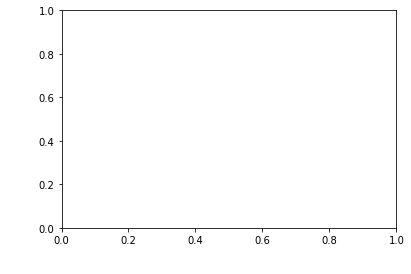

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()